In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("ex1data1.txt",
                   names=['Population', 'Profit'])
print(data.head())

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [4]:
# 打印数据信息
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None


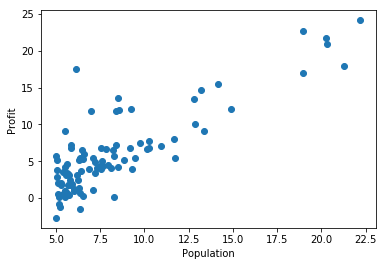

In [5]:
# 使用matplotlib绘图
fig = plt.figure()
plt.xlabel('Population')
plt.ylabel('Profit')
plt.scatter(data.Population, data.Profit)
plt.show()

In [6]:
def get_X(df):
    # ones是m行一列的dataframe
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    # 合并数据，根据列合并
    data = pd.concat([ones, df], axis=1)
    # 上面两行完成的操作，就是在原有的数据上添加一列全为0的数据
    
    # 返回ndarray,不是矩阵
    return data.iloc[:, :-1].values 

def get_y(df):
    # df.iloc[:, -1]是指df的最后一列
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    # 特征缩放
    return df.apply(lambda column: (column - column.mean()) / column.std())

# 计算代价函数

In [7]:
X = get_X(data)
y = get_y(data)

# 看一下数据的维度
print(X.shape, type(X))
print(y.shape, type(y))

# 输出数据看一下
print(X)
print("------------------------")
print(y)

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.  

In [8]:
# X.shape[1] = 2, 代表特征数
theta = np.zeros(X.shape[1])
print(theta.shape)

(2,)


In [9]:
def Hypothesis(X, theta):
    return X.dot(theta)

In [17]:
'''
X: R(m*n), m样本数, n特征数
y: R(m)
theta: R(n), 线性回归的参数,(假设函数的theta0,theta1)
'''
def lr_cost(theta, X, y):
    # m样本数
    m = X.shape[0]
    # 假设函数
    hypothesis = Hypothesis(X, theta)
    # 硬上公式
    cost = np.square(hypothesis - y).sum() / (2 * m)
    return cost

In [30]:
lr_cost(theta, X, y)

32.072733877455676

# 批量梯度下降

In [46]:
# 单次下降
def gradient(theta, X, y):
    m = X.shape[0]
    J = X.T.dot((Hypothesis(X, theta) - y)) / m
    #inner = X.T @ (X @ theta - y) / m
    return J

In [55]:
'''
批量梯度下降函数
拟合线性回归
iteration 迭代次数
'''

def batch_gradient_decent(theta, X, y, iteration, alpha = 0.01):
    cost_data = lr_cost(theta, X, y)
    # 拷贝一份theta数据，不与原来的混淆
    theta_copy = theta.copy()
    for _ in range(iteration):
        theta_copy = theta_copy - alpha * gradient(theta_copy, X, y)
        cost_data = np.append(cost_data, lr_cost(theta_copy, X, y))
    
    return theta_copy, cost_data

In [67]:
# 迭代次数为1000
iteration = 500
final_theta, final_cost_data = batch_gradient_decent(theta, X, y, iteration)

In [68]:
print(final_theta)

[-2.28286727  1.03099898]


In [69]:
print(final_cost_data)

[32.07273388  6.73719046  5.93159357  5.90115471  5.89522859  5.89009494
  5.88500416  5.87993248  5.87487909  5.86984391  5.86482687  5.85982789
  5.85484692  5.84988389  5.84493874  5.8400114   5.83510181  5.8302099
  5.82533562  5.82047889  5.81563965  5.81081784  5.8060134   5.80122627
  5.79645638  5.79170367  5.78696808  5.78224955  5.77754801  5.77286341
  5.76819568  5.76354477  5.75891061  5.75429313  5.7496923   5.74510803
  5.74054027  5.73598897  5.73145406  5.72693549  5.72243319  5.71794711
  5.71347718  5.70902336  5.70458558  5.70016379  5.69575792  5.69136792
  5.68699373  5.6826353   5.67829257  5.67396548  5.66965398  5.665358
  5.6610775   5.65681242  5.6525627   5.64832829  5.64410913  5.63990517
  5.63571635  5.63154261  5.62738391  5.6232402   5.6191114   5.61499748
  5.61089837  5.60681403  5.60274441  5.59868944  5.59464907  5.59062326
  5.58661195  5.58261509  5.57863263  5.57466451  5.57071068  5.56677109
  5.5628457   5.55893444  5.55503727  5.55115414  5.54

In [85]:
# 计算最终的代价函数
lr_cost(final_theta, X, y)

4.7138095311168655

## 代价函数可视化

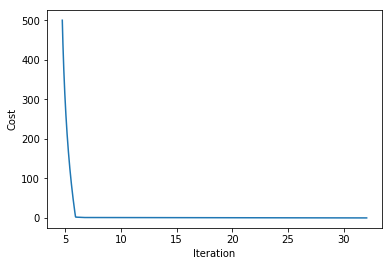

In [86]:
'''
此方法官方已弃用
ax = sns.tsplot(final_cost_data, np.arange(iteration+1))
ax.set_xlabel('iteration')
ax.set_ylabel('cost')
plt.show()
'''
fig = plt.figure()
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(final_cost_data, np.arange(iteration+1))
plt.show()

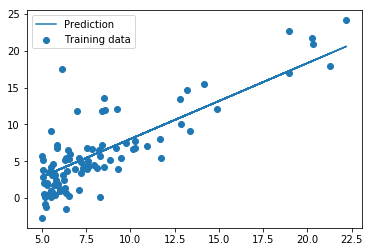

In [88]:
# 截距
b = final_theta[0]
# 斜率
k = final_theta[1]

plt.scatter(data['Population'], data['Profit'], label='Training data')
plt.plot(data.Population, k * data.Population + b, label='Prediction')
plt.legend(loc=2)
plt.show()